# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

3
10
16
9
29
38
1
11
26
26


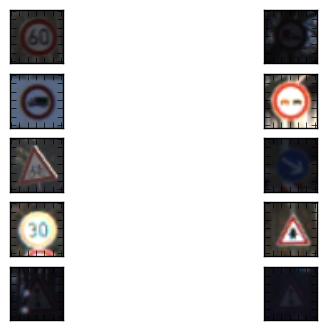

In [3]:
### Data exploration visualization goes here.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize a random subset of the images
# create an array of indices the same size as y_train
indx = np.arange(y_train.shape[0])
# shuffle the indices
np.random.shuffle(indx)
# create subplot and fill with images
f, axarr = plt.subplots(5, 2)
for i in range(5):
    for j in range(2):
        axarr[i, j].imshow(X_train[indx[j+5*i]])
        plt.setp(axarr[i,j].get_xticklabels(), visible=False)
        plt.setp(axarr[i,j].get_yticklabels(), visible=False)
        print(y_train[indx[j+5*i]])
plt.show()

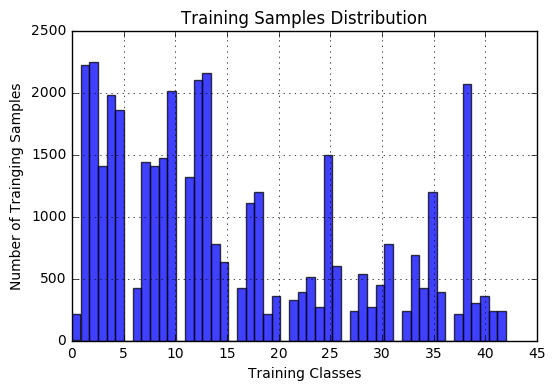

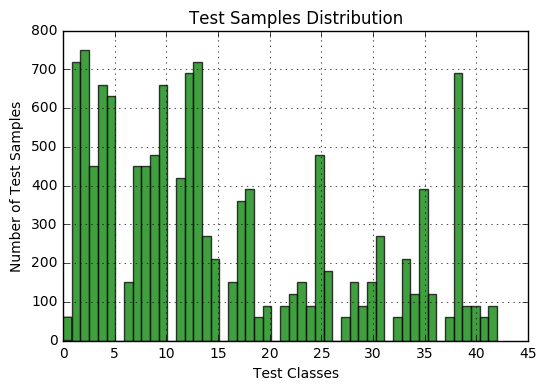

In [8]:
# Show the distribution of classes in the training and test sets
# the histogram of the data
plt.figure(1)
n, bins, patches = plt.hist(y_train, 50, facecolor='blue', alpha=0.75)

plt.xlabel('Training Classes')
plt.ylabel('Number of Trainging Samples')
plt.title('Training Samples Distribution')
plt.grid(True)

plt.figure(2)
n, bins, patches = plt.hist(y_test, 50, facecolor='green', alpha=0.75)

plt.xlabel('Test Classes')
plt.ylabel('Number of Test Samples')
plt.title('Test Samples Distribution')
plt.grid(True)

plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Preprocess the data here.

#Re-scale data - rescale inputs from 0-255 to 0-1
# (data / 255.0) defaults to float64. Data is set to float32 to reduce memory usage
def rescale(data):
    data = data.astype('float32')
    return data / 255.0

X_train = rescale(X_train)
X_test = rescale(X_test)

#def standardize(data):
#    mean = np.mean(data)
#    std = np.std(data)
#    data -= mean
#    data /= std
#    return data

#X_train = standardize(X_train)
#X_test = standardize(X_test)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

Answer:

Only re-scaling is applied and all other pre-processing methods are ignored. This is to allow deep network to learn features and to avoid manually process/retain required image features.

Re-scaling is required in order to scale the gradients to a manageable level. 
RGB images are represented by numbers ranging from 0 to 255. This would require large numbers in the weight matrices of a neural network, with correspondingly high gradients. This would make training very difficult using gradient-descent methods. By scaling the input in the range [0-1], this issue can be avoided.

Standardization was tried out. However, performance deteriorated a bit. Since standardized data also include negative values, ReLU activation when applied ignores these values, hence leading to loss of information. This is possibly causing the performance to deteriorate.


In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,
                                                            test_size=0.2,random_state=832289)


print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))


# Define input / output 
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# References - 
#1. https://www.tensorflow.org/tutorials/deep_cnn/#convolutional-neural-networks
#2. http://stackoverflow.com/questions/40498185/data-augmentation-implementation-using-tensorflow
def prep_data_augment(image):
    height = 32
    width = 32

    # Randomly crop a [height, width] section of the image.
    distorted_image = tf.random_crop(image, [height, width, 3])

    # Randomly flip the image horizontally.
    distorted_image = tf.image.random_flip_left_right(distorted_image)

    distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
    distorted_image = tf.image.random_contrast(distorted_image,lower=0.2, upper=1.8)

    # Subtract off the mean and divide by the variance of the pixels.
    float_image = tf.image.per_image_standardization(distorted_image)

    # Set the shapes of tensors.
    float_image.set_shape([height, width, 3])

    return float_image

def data_augment(input_tensor):
    output_tensor = tf.map_fn(prep_data_augment, input_tensor)
    return output_tensor

x = data_augment(x)


Training Set:   31367 samples
Validation Set: 7842 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

Answer:

The training dataset is split into training and validation datasets, with 20% of the data kept aside for validation. Scikit-Learn's train_test_split was used for this.
By keeping the testing set completely separate from the training process, we can avoid accidentally overfitting the net to the testing set.

Data is generated using augmentation methods to make network more robust, generalize well towards such variations in the testing set. TensorFlow-provided APIs are utilized to distort image. Cifar-10 TensorFlow tutorial and Q&A from stackflow have been referred.

In [11]:
### Define your architecture here.
EPOCHS = 15
BATCH_SIZE = 64
wd = 0.0                
drop_out1 = 0.8
drop_out2 = 0.5
drop_out3 = 0.5

f1_out = 800   
f2_out = 400   

from tensorflow.contrib.layers import flatten

init_conv2d = tf.contrib.layers.xavier_initializer_conv2d(uniform=True, seed=None, dtype=tf.float32)
init = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)
weights = {
           'c1': tf.get_variable("c1", shape=[5, 5, 3, 6], initializer=init_conv2d),
           'c2': tf.get_variable("c2", shape=[5, 5, 6, 10], initializer=init_conv2d),
           'c3': tf.get_variable("c3", shape=[5, 5, 10, 16], initializer=init_conv2d),
           'c4': tf.get_variable("c4", shape=[5, 5, 16, 32], initializer=init_conv2d),
           'f1': tf.get_variable("f1", shape=[5*5*32, f1_out], initializer=init),
           'f2': tf.get_variable("f2", shape=[f1_out, f2_out], initializer=init),
           'out': tf.get_variable("out", shape=[f2_out, n_classes], initializer=init)}

bias = {
          'c1': tf.Variable(tf.zeros([6])),
          'c2': tf.Variable(tf.zeros([10])),
          'c3': tf.Variable(tf.zeros([16])),
          'c4': tf.Variable(tf.zeros([32])),
          'f1': tf.Variable(tf.zeros([f1_out])),
          'f2': tf.Variable(tf.zeros([f2_out])),
          'out': tf.Variable(tf.zeros([43]))}

regularizers = (tf.nn.l2_loss(weights['c1']) + tf.nn.l2_loss(bias['c1']) +
              tf.nn.l2_loss(weights['c2']) + tf.nn.l2_loss(bias['c2']) +
              tf.nn.l2_loss(weights['c3']) + tf.nn.l2_loss(bias['c3']) +
              tf.nn.l2_loss(weights['c4']) + tf.nn.l2_loss(bias['c4']) +
              tf.nn.l2_loss(weights['f1']) + tf.nn.l2_loss(bias['f1']) +
              tf.nn.l2_loss(weights['f2']) + tf.nn.l2_loss(bias['f2']) +
              tf.nn.l2_loss(weights['out']) + tf.nn.l2_loss(bias['out']))

keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
keep_prob3 = tf.placeholder(tf.float32)

def convolve(x, W, b, strides, pad):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=pad)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def Model(x, use_dropout=False):    
                                          
    # Layer 1: Convolutional. 
    conv1 = convolve(x, weights['c1'], bias['c1'], 1, 'VALID')
    
    # Layer 2: Convolutional. 
    conv2 = convolve(conv1, weights['c2'], bias['c2'], 1, 'SAME')
    conv2= tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

    if use_dropout:
        conv2 = tf.nn.dropout(conv2, keep_prob1)        
#    conv2 = tf.nn.batch_normalization(conv2, mean=0.0, variance=1.0, offset=None, scale=None, variance_epsilon=0.001)

    # Layer 3: Convolutional. 
    conv3 = convolve(conv2, weights['c3'], bias['c3'], 1, 'VALID')

    # Layer 4: Convolutional. 
    conv4 = convolve(conv3, weights['c4'], bias['c4'], 1, 'SAME')
    conv4 = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
#    conv4 = tf.nn.batch_normalization(conv4, mean=0.0, variance=1.0, offset=None, scale=None, variance_epsilon=0.001)    

    # Flatten.
    reshape = flatten(conv4)

    # Layer 5: Fully Connected. 
    if use_dropout:
        reshape = tf.nn.dropout(reshape, keep_prob1)    
    h_layer1 = tf.matmul(reshape, weights['f1']) + bias['f1']
    h_layer1 = tf.nn.relu(h_layer1)
#    h_layer1 = tf.nn.batch_normalization(h_layer1, mean=0.0, variance=1.0, offset=None, scale=None, variance_epsilon=0.001)
    
    # Layer 6: Fully Connected. 
    if use_dropout:
        h_layer1 = tf.nn.dropout(h_layer1, keep_prob2)
    h_layer2 = tf.matmul(h_layer1, weights['f2']) + bias['f2']
    h_layer2 = tf.nn.relu(h_layer2)
#    h_layer2 = tf.nn.batch_normalization(h_layer2, mean=0.0, variance=1.0, offset=None, scale=None, variance_epsilon=0.001)
    
    # Layer 7: Fully Connected. 
    if use_dropout:
        h_layer2 = tf.nn.dropout(h_layer2, keep_prob3)
    logits = tf.matmul(h_layer2, weights['out']) + bias['out']

    return logits

lr = 0.001

logits = Model(x, True)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
loss_operation += wd * regularizers

global_step = tf.Variable(0)
lr = tf.train.exponential_decay(lr, global_step, len(X_train), 0.98, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_operation = optimizer.minimize(loss_operation, global_step=global_step)

# Graph for validation accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Evaluation graph
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 1.0, keep_prob2: 1.0, keep_prob3: 1.0})
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 1.0, keep_prob2: 1.0, keep_prob3: 1.0})        
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    return total_loss/num_examples, total_accuracy / num_examples


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


Answer:

The final architecture has 4 convolutional layers and two fully connected layers. The convolutional layers has depths of 6, 10, 16, 32 respectively while the two fully connected layers has 800 and 400 neurons.

    Input: (32, 32, 3)

    Conv5x5 - VALID: (28, 28, 6)
    Conv5x5 - SAME: (28, 28, 10)
    Max Pool: (14, 14, 10)
    Dropout - 0.8

    Conv5x5 - VALID: (10, 10, 16)
    Conv5x5 - SAME: (10, 10, 32)
    MAX Pool: (5, 5, 32)
    Flatten: (800)
    Dropout - 0.8

    FullyConnected: (800)
    Dropout 0.5
    FullyConnected: (400)
    Dropout 0.5
    Output: (43)

Different configurations were tested and the following results were obtained:
=> 97.2% Test accuracy after 15 epochs of training


In [12]:
### Train your model here.
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)

        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]

            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: drop_out1, keep_prob2: drop_out2, keep_prob3: drop_out3})
            
        val_loss, validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation loss = {:.3f}".format(val_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, 'p2_model')
    print("Model saved")


Training...

EPOCH 1 ...
Validation loss = 0.275
Validation Accuracy = 0.915

EPOCH 2 ...
Validation loss = 0.129
Validation Accuracy = 0.963

EPOCH 3 ...
Validation loss = 0.067
Validation Accuracy = 0.980

EPOCH 4 ...
Validation loss = 0.047
Validation Accuracy = 0.985

EPOCH 5 ...
Validation loss = 0.047
Validation Accuracy = 0.986

EPOCH 6 ...
Validation loss = 0.029
Validation Accuracy = 0.992

EPOCH 7 ...
Validation loss = 0.023
Validation Accuracy = 0.994

EPOCH 8 ...
Validation loss = 0.023
Validation Accuracy = 0.993

EPOCH 9 ...
Validation loss = 0.027
Validation Accuracy = 0.992

EPOCH 10 ...
Validation loss = 0.028
Validation Accuracy = 0.993

EPOCH 11 ...
Validation loss = 0.017
Validation Accuracy = 0.996

EPOCH 12 ...
Validation loss = 0.025
Validation Accuracy = 0.994

EPOCH 13 ...
Validation loss = 0.026
Validation Accuracy = 0.992

EPOCH 14 ...
Validation loss = 0.018
Validation Accuracy = 0.994

EPOCH 15 ...
Validation loss = 0.021
Validation Accuracy = 0.994



In [6]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('p2_model.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))

    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.972


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


Answer:

Training is done on a laptop with 4GB RAM, 2GB GPU (nvidia geforce 840M) and Ubuntu 16.04. Considering the hardware constraints, number of epochs is kept minimum (epoch=15). Also, batch-size of 64 is considered to ensure, we do not run out of GPU memory during the training process.


Learning rate: exponential decay is adopted for better convergence toward the end of the training process.

weight initialization - After trial and error, used TensorFlow-provided APIs to initialize weights through Xavier initializers. This did yield good results consistently and initializers have been retained.
Ref: http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization

Optimizer: AdaGrad and AdamOptimizers were tried out and eventually settled for AdamOptimizer with learning rate of 0.001

Generalization:
1. Data augmentation
2. Drop-out
3. Batch normalization - did not yield good results
4. L2 regularization with weight decay of 0.0001 - did not yield good results

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

Answer:

Started with linear classifier. This being a simple model helped to get on data pre-processing methods. Eventually, expanded to fully connected network and further to convolutional networks. The network was initially modelled based on LeNet. Based on trial and error, additional convolutional layers were added and hyper parameters were tuned.

As an alternative, tried adopting layers from inception module (1x1, avg pooling, 3x3, 5x5)
- concatenating and further feeding to fully connected layers.
- Using various combinations/ordering of these layers as in LeNet and finally to fully connected layers


Performance was just not good enough to consider further fine-tuning. Though this is a miniscule version of GoogleNet and hardware being a limitation factor, intend to continue trial/eror.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

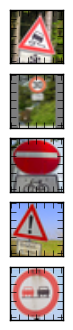

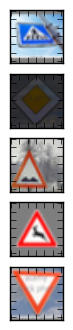

In [15]:
### Load the images and plot them here.
from skimage import io

image_size = 32
num_channels = 3

test_imgs = np.uint8(np.zeros((10,32,32,3)))
for i in range(1,11):
    image = io.imread('test_images/test{}.jpg'.format(str(i)))
    test_imgs[i-1] = image

test_img_data = test_imgs.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)

# Images rescaled to be consistent with training, validation data
test_img_data = rescale(test_img_data)

f, axarr = plt.subplots(5, 1)
for i in range(5):
    axarr[i].imshow(test_imgs[i])
    plt.setp(axarr[i].get_xticklabels(), visible=False)
    plt.setp(axarr[i].get_yticklabels(), visible=False)
f, axarr2 = plt.subplots(5, 1)
for i in range(5,10):
    axarr2[i-5].imshow(test_imgs[i])
    plt.setp(axarr2[i-5].get_xticklabels(), visible=False)
    plt.setp(axarr2[i-5].get_yticklabels(), visible=False)
plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



Answer:

In the Training samples distribution shown above, frequency in classes [1 - 15] is very high. Strategy was to avoid selecting images in this range OR select ones which are very hazy and not clear even to human eyes.

    Image 1: Tilted, but sign is at the center of the image
    Image 2: Blurred. Required sign is at the top of the image
    Image 3: Slanted. Required sign is at the top of the image
    Image 4: Slanted. Sign is towards left of the image
    Image 6: Slanted and not so clearly visible
    Image 7: Dull
    Image 8: Sign is to the left of the image

In [16]:
### Run the predictions here.
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('p2_model.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    print('Model restored with latest weights')

    data_placeholder = tf.placeholder(tf.float32, [10, 32, 32, 3])
    predictions = tf.nn.softmax(Model(data_placeholder))

    pred_vals = sess.run(predictions, feed_dict={data_placeholder: test_img_data})
    top_k = sess.run(tf.nn.top_k(pred_vals, 3, sorted=True))

    print("Predicted Labels")
    print(np.argmax(pred_vals, 1))


Model restored with latest weights
Predicted Labels
[23 10 12 29  9 34 12 21 31 13]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


Answer:

Accuracy achieved for the chosen images is 50%

<table>
  <tr>
    <th>Test Image<br></th>
    <th>Class ID<br></th>
    <th>Sign Name<br></th>
    <th># of training samples<br></th>
    <th>Visibility<br></th>
    <th>Result<br></th>
  </tr>
  <tr>
    <td>1</td>
    <td>23</td>
    <td>Slippery road</td>
    <td>400</td>
    <td>Moderate</td>
    <td>23</td>
  </tr>
  <tr>
    <td>2</td>
    <td>1</td>
    <td>Speed limit (30km/hr)</td>
    <td>2250</td>
    <td>Bad</td>
    <td></td>
  </tr>
  <tr>
    <td>3</td>
    <td>17</td>
    <td>No entry</td>
    <td>450</td>
    <td>Good</td>
    <td></td>
  </tr>
  <tr>
    <td>4</td>
    <td>18</td>
    <td>General caution</td>
    <td>1250</td>
    <td>Good</td>
    <td></td>
  </tr>
  <tr>
    <td>5</td>
    <td>9</td>
    <td>No passing</td>
    <td>1500</td>
    <td>Good</td>
    <td>9</td>
  </tr>
  <tr>
    <td>6</td>
    <td>27</td>
    <td>Pedestrians</td>
    <td>250</td>
    <td>Bad</td>
    <td></td>
  </tr>
  <tr>
    <td>7</td>
    <td>12</td>
    <td>Priority road</td>
    <td>2100</td>
    <td>Bad</td>
    <td>12</td>
  </tr>
  <tr>
    <td>8</td>
    <td>22</td>
    <td>Bumpy road</td>
    <td>400</td>
    <td>Moderate</td>
    <td></td>
  </tr>
  <tr>
    <td>9</td>
    <td>31</td>
    <td>Wild animals crossing</td>
    <td>750</td>
    <td>Good</td>
    <td>31</td>
  </tr>
  <tr>
    <td>10</td>
    <td>13</td>
    <td>Yield</td>
    <td>2200</td>
    <td>Good</td>
    <td>13</td>
  </tr>
</table>


It is observed that network failed to correctly classify ones that were
- Not clearly visible
- Signs not at the center of the image. Given training set, network is not translation invariant
- Network has difficulty in recognizing signs that are slanted. So, it is not view point invariant

Training set should be enhanced for the above. Also, training data should be uniformly distributed across all classes.

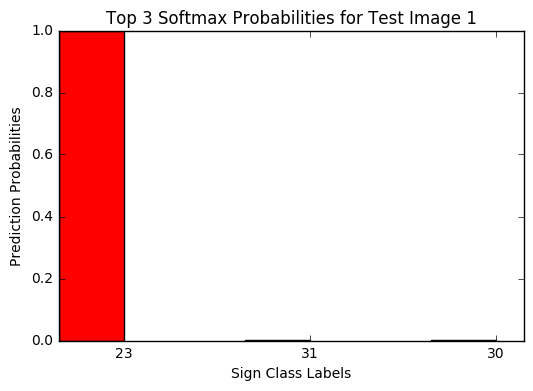

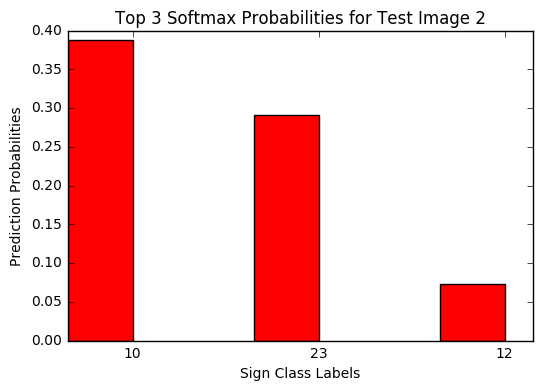

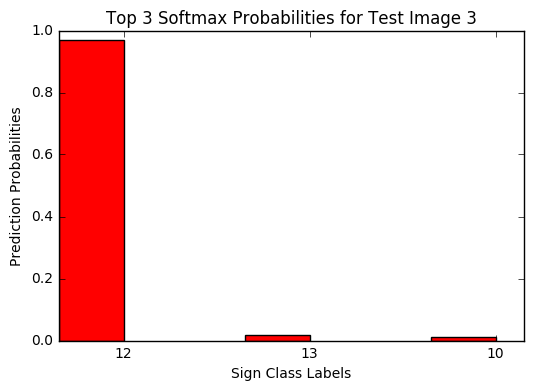

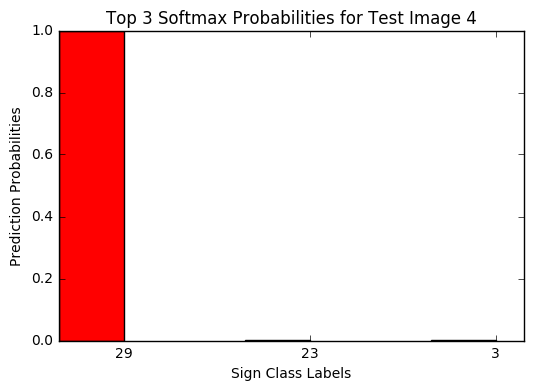

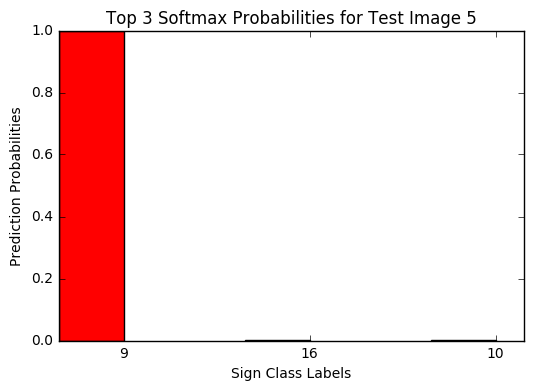

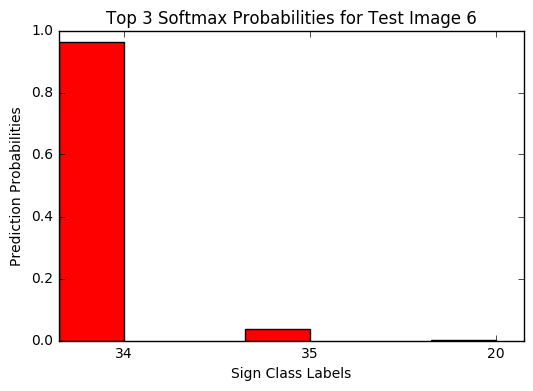

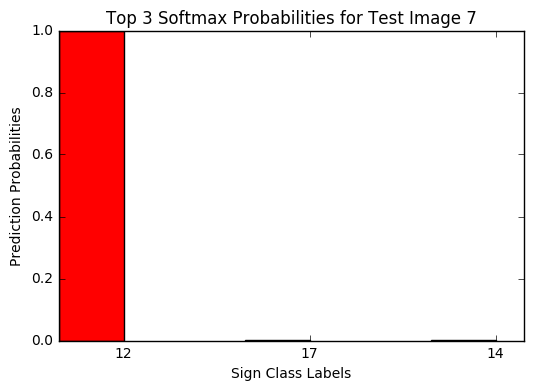

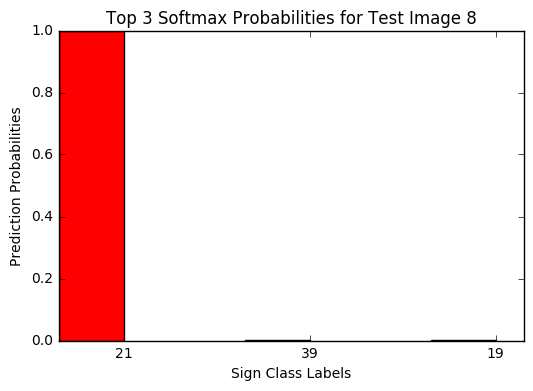

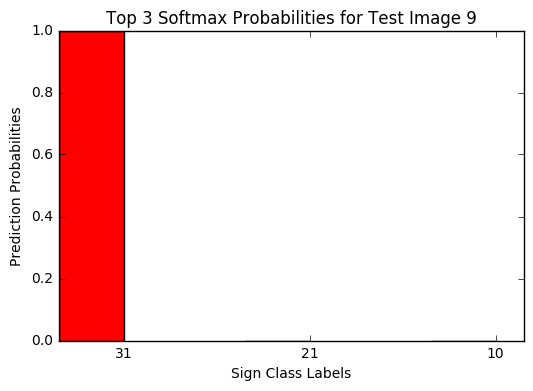

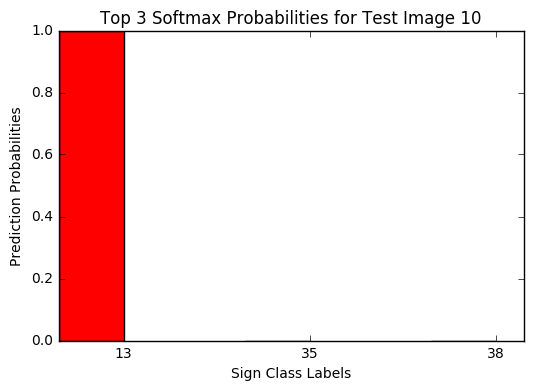

In [17]:
### Visualize the softmax probabilities here.

# Pull out values and indices for top 3 softmax probability analysis
top_k_values = top_k[0]
top_k_indices = top_k[1]

N = 3

ind = np.arange(N)  # the x locations for the values
width = 0.35       # the width of the bars

for i in range(10):
    plt.figure(i)
    values = top_k_values[i]
    plt.bar(ind, values, width, color='r')
    plt.ylabel('Prediction Probabilities')
    plt.xlabel('Sign Class Labels')
    plt.title('Top 3 Softmax Probabilities for Test Image {}'.format(str(i+1)))
    plt.xticks(ind+width, tuple(top_k_indices[i]))

plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Answer:

None of the wrongly classified appear in top-3

<table>
  <tr>
    <th>Test Image<br></th>
    <th>Class ID<br></th>
    <th>Sign Name<br></th>
    <th>Result<br></th>
    <th>Top 3<br></th>
  </tr>
  <tr>
    <td>1</td>
    <td>23</td>
    <td>Slippery road</td>
    <td>23</td>
    <td></td>
  </tr>
  <tr>
    <td>2</td>
    <td>1</td>
    <td>Speed limit (30km/hr)</td>
    <td></td>
    <td>10,23,12</td>
  </tr>
  <tr>
    <td>3</td>
    <td>17</td>
    <td>No entry</td>
    <td></td>
    <td>12,13,10</td>
  </tr>
  <tr>
    <td>4</td>
    <td>18</td>
    <td>General caution</td>
    <td></td>
    <td>29,23,3</td>
  </tr>
  <tr>
    <td>5</td>
    <td>9</td>
    <td>No passing</td>
    <td>9</td>
    <td></td>
  </tr>
  <tr>
    <td>6</td>
    <td>27</td>
    <td>Pedestrians</td>
    <td></td>
    <td>34,35,20</td>
  </tr>
  <tr>
    <td>7</td>
    <td>12</td>
    <td>Priority road</td>
    <td>12</td>
    <td></td>
  </tr>
  <tr>
    <td>8</td>
    <td>22</td>
    <td>Bumpy road</td>
    <td></td>
    <td>21,39,19</td>
  </tr>
  <tr>
    <td>9</td>
    <td>31</td>
    <td>Wild animals crossing</td>
    <td>31</td>
    <td></td>
  </tr>
  <tr>
    <td>10</td>
    <td>13</td>
    <td>Yield</td>
    <td>13</td>
    <td></td>
  </tr>
</table>

Top 3 probabilities for wrongly classified images

1 : Speed limit (30km/hr)
- 10: No passing for vehicles over 3.5 metric tons
- 23: Slippery road
- 12: Priority road

17: No entry
- 12: Priority road
- 13: Yield
- 10: No passing for vehicles over 3.5 metric tons

18: General caution
- 29: Bicycles crossing
- 23: Slippery road
- 3 : Speed limit (60km/h)

27: Pedestrians
- 34: Turn left ahead
- 35: Ahead only
- 20: Dangerous curve to the right

22: Bumpy road
- 21: Double curve
- 39: Keep left
- 19: Dangerous curve to the left

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.